# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [77]:
# 1) import the pandas library as pd
import pandas as pd

In [78]:
# 2) import the csv file into a variable called df
df = pd.read_csv('Bertrand-physiodata.csv')

In [79]:
# 3) print the column names, just to make 
# sure that it matches what we have above
print(df.columns)

Index(['tags', 'real time', 'unix time', 'BVP', 'HR', 'EDA', 'TEMP', 'ACC_x',
       'ACC_y', 'ACC_z'],
      dtype='object')


In [80]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [81]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [83]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?
print(333575/64)
#HR is probably collected every second
print(333575/166788)
#ACC is probably collected 32 times per second
print(333575/20848) 
#EDA and temp are probably collected 4 times per second
#the rest are the same as BVP

5212.109375
1.9999940043648223
16.00033576362241


# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [84]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
%matplotlib inline
import matplotlib.pyplot as plt

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 312., 1885., 1222.,  641.,  430.,  256.,  169.,   82.,  110.,
          96.]),
 array([ 65.   ,  75.117,  85.234,  95.351, 105.468, 115.585, 125.702,
        135.819, 145.936, 156.053, 166.17 ]),
 <a list of 10 Patch objects>)

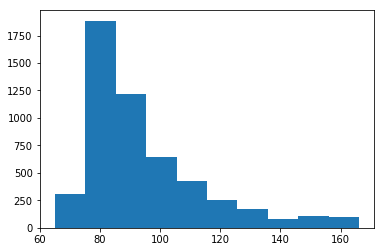

In [85]:
# 9) produce a histogram of the heart rate data; what can you say from it?
plt.hist(df['HR'])

Bertrand's heart rate is skewed, it generally stayed aroun 80-100, but did not fall below 70 or so. There are some outliers aroun 160.

[]

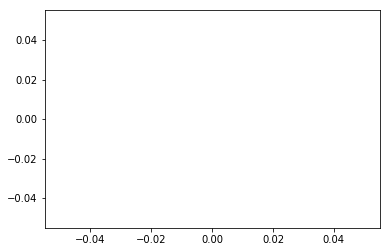

In [86]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
plt.plot(x= df['real time'], y=df['HR'])

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: Maybe I didn't reference the columns correctly- do I need to use ".loc" or use the index instead?
- reason 2: The time is stored as an object instead of as an actual date/time format
- reason 3: there are many rows with the same time stamp- looks like it's measured to the second but in fact we know there must be 64 rows per second based on the data collected. (i.e. now I see that means HR is missing for many rows)



After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

     tags      real time     unix time     BVP     HR       EDA   TEMP  ACC_x  \
640   0.0  9/11/18 08:28  1.536669e+09  -79.05  72.00  1.059777  33.31  -13.0   
704   0.0  9/11/18 08:28  1.536669e+09  218.11  71.50  1.125105  33.31  -35.0   
768   0.0  9/11/18 08:28  1.536669e+09  -20.02  65.00  1.501703  33.31  -40.0   
832   0.0  9/11/18 08:28  1.536669e+09   76.70  92.25  1.204524  33.31  -31.0   
896   0.0  9/11/18 08:28  1.536669e+09   71.85  87.60  1.184028  33.31  -38.0   

     ACC_y  ACC_z  
640   65.0  -24.0  
704   -7.0   34.0  
768  -12.0   34.0  
832   13.0   46.0  
896    8.0   51.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 640 to 333868
Data columns (total 10 columns):
tags         5203 non-null float64
real time    5203 non-null object
unix time    5203 non-null float64
BVP          5203 non-null float64
HR           5203 non-null float64
EDA          5203 non-null float64
TEMP         5202 non-null float64
ACC_x        5203 non-null float64
ACC

[]

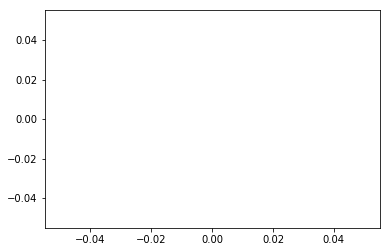

In [87]:
# 12) Fix your dataframe using the link above: 
dfhr = df[df['HR'].notnull()]
print(dfhr.head())
print(dfhr.info())

plt.plot(x=dfhr['real time'], y = dfhr['HR']) #plot still doesn't work- because of the time issue?

### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

    tags      real time     unix time    BVP  HR       EDA   TEMP  ACC_x  \
0    0.0  9/11/18 08:28  1.536669e+09   0.00 NaN  0.000000  33.31  -50.0   
16   0.0  9/11/18 08:28  1.536669e+09  -0.05 NaN  0.836457  33.31  -32.0   
32   0.0  9/11/18 08:28  1.536669e+09   6.20 NaN  1.183860  33.31  -14.0   
48   0.0  9/11/18 08:28  1.536669e+09  22.90 NaN  1.167277  33.31  -22.0   
64   0.0  9/11/18 08:28  1.536669e+09  93.76 NaN  1.278719  33.31  -17.0   

    ACC_y  ACC_z  
0     7.0   28.0  
16   64.0   27.0  
32   57.0   50.0  
48   52.0   24.0  
64   53.0   27.0  


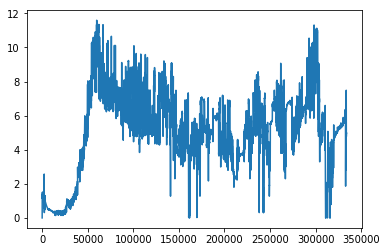

In [88]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
dfeda = df[df['EDA'].notnull()]
print(dfeda.head())

plt.plot(dfeda['EDA'])

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

                     tags     unix time  BVP  HR  EDA   TEMP  ACC_x  ACC_y  \
real time                                                                    
2018-09-11 08:28:00   0.0  1.536669e+09  0.0 NaN  0.0  33.31  -50.0    7.0   
2018-09-11 08:28:00   0.0  1.536669e+09  0.0 NaN  NaN    NaN    NaN    NaN   
2018-09-11 08:28:00   0.0  1.536669e+09  0.0 NaN  NaN    NaN  -41.0    6.0   
2018-09-11 08:28:00   0.0  1.536669e+09  0.0 NaN  NaN    NaN    NaN    NaN   
2018-09-11 08:28:00   0.0  1.536669e+09  0.0 NaN  NaN    NaN  -40.0    7.0   

                     ACC_z  
real time                   
2018-09-11 08:28:00   28.0  
2018-09-11 08:28:00    NaN  
2018-09-11 08:28:00   28.0  
2018-09-11 08:28:00    NaN  
2018-09-11 08:28:00   25.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333876 entries, 2018-09-11 08:28:00 to NaT
Data columns (total 9 columns):
tags         333875 non-null float64
unix time    333875 non-null float64
BVP          333575 non-null float64
HR         

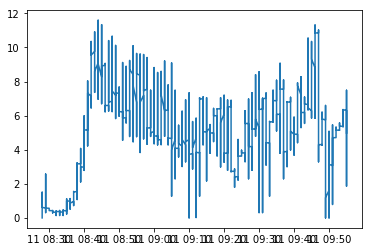

In [89]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3
dftimes = pd.read_csv('Bertrand-physiodata.csv', parse_dates = True, index_col = 'real time')

print(dftimes.head())
print(dftimes.info())
                                                                
dfeda_times = dftimes[dftimes['EDA'].notnull()]
print(dfeda_times.head())

plt.plot(dfeda_times['EDA'])

In [90]:
# 15) print the mean and median values of the EDA data; explain how they are different
print(dfeda_times['EDA'].mean())
print(dfeda_times['EDA'].median())

#the median is slighly higher, indicating there might be some low or zero values that drag the average down


5.18050743853421
5.320238


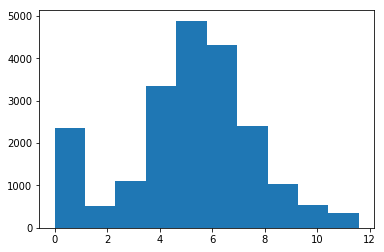

In [91]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?
plt.hist(dfeda_times['EDA'])
plt.show()
#yes there is a concentration around zero

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [92]:
# 17) filter both the EDA and HR values to keep the non-null rows:
df_hreda = dftimes[dftimes['EDA'].notnull()]
df_hreda = dftimes[dftimes['HR'].notnull()]
print(df_hreda.head())
print(df_hreda.info())

                     tags     unix time     BVP     HR       EDA   TEMP  \
real time                                                                 
2018-09-11 08:28:00   0.0  1.536669e+09  -79.05  72.00  1.059777  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09  218.11  71.50  1.125105  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09  -20.02  65.00  1.501703  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09   76.70  92.25  1.204524  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09   71.85  87.60  1.184028  33.31   

                     ACC_x  ACC_y  ACC_z  
real time                                 
2018-09-11 08:28:00  -13.0   65.0  -24.0  
2018-09-11 08:28:00  -35.0   -7.0   34.0  
2018-09-11 08:28:00  -40.0  -12.0   34.0  
2018-09-11 08:28:00  -31.0   13.0   46.0  
2018-09-11 08:28:00  -38.0    8.0   51.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5203 entries, 2018-09-11 08:28:00 to 2018-09-11 09:55:00
Data columns (total 9 columns):
tags         5203 non-null floa

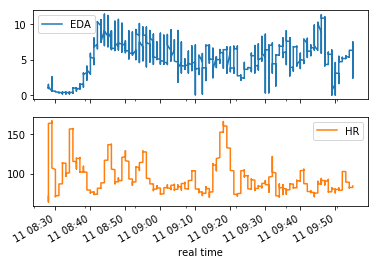

In [93]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
#plt.subplot(df_hreda['EDA'], df_hreda['HR'])

df_hreda.loc[:, ['EDA','HR']].plot(subplots=True)
plt.show()

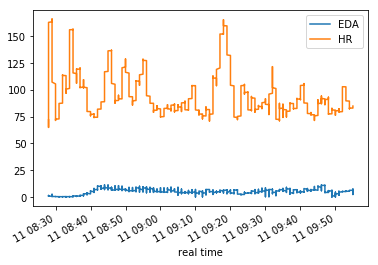

In [94]:
# 19) plot EDA and HR on the same graph; what went wrong?

df_hreda.loc[:, ['EDA','HR']].plot()
plt.show()

# the scales are different so you can't see EDA

In [95]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
###I think when you say normalize you mean standardize? So I am creating a z-score essentially. 
#This works but I get an error message...

meaneda = df_hreda['EDA'].mean()
sdeda = df_hreda['EDA'].std()

df_hreda['EDAstd'] = (df_hreda['EDA']-meaneda)/sdeda
print(df_hreda.head())

meanhr = df_hreda['HR'].mean()
sdhr = df_hreda['HR'].std()

df_hreda['HRstd'] = (df_hreda['HR']-meanhr)/sdhr
print(df_hreda.head())


                     tags     unix time     BVP     HR       EDA   TEMP  \
real time                                                                 
2018-09-11 08:28:00   0.0  1.536669e+09  -79.05  72.00  1.059777  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09  218.11  71.50  1.125105  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09  -20.02  65.00  1.501703  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09   76.70  92.25  1.204524  33.31   
2018-09-11 08:28:00   0.0  1.536669e+09   71.85  87.60  1.184028  33.31   

                     ACC_x  ACC_y  ACC_z    EDAstd  
real time                                           
2018-09-11 08:28:00  -13.0   65.0  -24.0 -1.704047  
2018-09-11 08:28:00  -35.0   -7.0   34.0 -1.677079  
2018-09-11 08:28:00  -40.0  -12.0   34.0 -1.521616  
2018-09-11 08:28:00  -31.0   13.0   46.0 -1.644294  
2018-09-11 08:28:00  -38.0    8.0   51.0 -1.652755  
                     tags     unix time     BVP     HR       EDA   TEMP  \
real time                   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


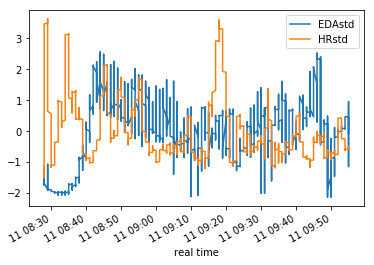

In [96]:
# 21) plot EDA and HR on the same graph; does the result look better?
df_hreda.loc[:, ['EDAstd','HRstd']].plot()
plt.show()

#yeah, easier to see, but have we lost information by standardizing them?

In [97]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?
#they acrtually look like they move in opposite patterns- at the start EDA is quite high while HR is low, 
#and the peak in the middle doesn't seem related to HR's level...

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

Typically I prefer not to normalize (or standardize) variables because you lose their real-world interpretability. But, when your aim is compare effects of two variables that are on different scales it can be useful. I don't know enought about EDA and heart rate to have a sense of whether it's appropriate here. Does a beat-per-minute mean something substantive that we lose when we talk in terms of a standard deviation change instead?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [98]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

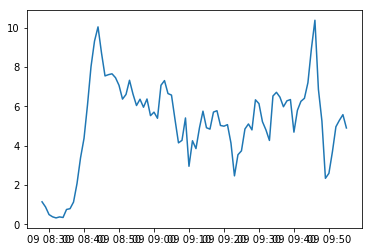

In [106]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7
minutes_df = filtered_df.EDA.resample('60s').mean()
minutes_df.head()

plt.plot(minutes_df)

real time
2018-11-09 08:28:00    0.000000
2018-11-09 08:28:00    0.836457
2018-11-09 08:28:00    1.183860
2018-11-09 08:28:00    1.167277
2018-11-09 08:28:00    1.278719
Name: EDA, dtype: float64


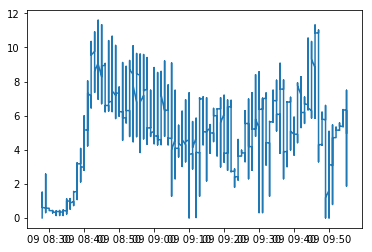

In [122]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
rolling_df = filtered_df['EDA'].rolling(1).mean()
print(rolling_df.head())

plt.plot(rolling_df)

In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?
# the rolling graph is less smooth but also the data frame is filling with missing data, I'm not sure why.

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

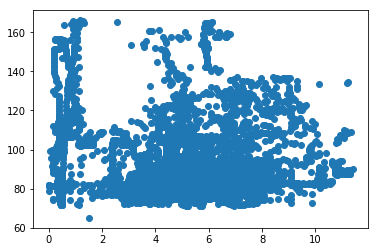

In [112]:
# 26) create a scatter plot between HR and EDA:
plt.scatter(x= filtered_df['EDA'], y = filtered_df['HR'])
plt.show()

In [115]:
# 27) compute pearson's correlation between the HR and EDA data
filtered_df['EDA'].corr(filtered_df['HR'])

-0.13861928732609413

In [24]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
#no- these are not linearly related